In [11]:
import sys
import graphviz
import numpy as np
import matplotlib.pyplot as plt

In [59]:

graph = graphviz.Digraph()
#vec = [int(_) for _ in sys.argv[2:]]
data = np.loadtxt("./data.txt")
vec = [int(x) for x in data]

N = (len(vec)-1)//2

def label(x):
    if x<N:
        return 'Unit %s'%(x)
    elif x==N:
        return 'Concentrate'
    else:
        return 'Tailings'

graph.attr(rankdir='LR')
graph.attr('node', shape='rectangle')

graph.edge('Feed', label(vec[0]), color='blue',
           headport='w', tailport='e',
           arrowhead='normal', arrowtail='normal')

for _ in range(N):
    graph.edge(label(_), label(vec[2*_+1]), color='blue',
               headport='w', tailport='n',
               arrowhead='normal')
    graph.edge(label(_), label(vec[2*_+2]), color='red',
               headport='w', tailport='s',
               arrowhead='normal')

with graph.subgraph() as s:
    s.attr(rank = 'source')
    for n in ('Feed',):
        s.node(n)

with graph.subgraph() as s:
    s.attr(rank = 'sink')
    for n in ('Tailings', 'Concentrate'):
        s.node(n)

graph.attr(label="vector: %s"%vec)
graph.attr(label="revenue: %s"%performance[-1,0])
#graph.render(filename=sys.argv[1], cleanup=True)
graph.render('./graph/output', view=True)  

'./graph/output.pdf'

In [42]:
performance = np.loadtxt("./performance_list.txt")

In [26]:
performance

array([[ 7.62277e+00, -5.00441e+04, -2.40863e+04],
       [ 7.62277e+00, -5.06373e+04, -4.90553e+04],
       [ 7.62277e+00, -4.66924e+04, -9.26478e+02],
       [ 7.62277e+00,  7.37551e-01,  7.46992e+00],
       [ 7.62277e+00,  1.30451e+00,  7.30875e+00],
       [ 7.62277e+00, -2.31052e+02,  2.84927e+00],
       [ 7.62277e+00,  5.34932e+00,  7.56216e+00],
       [ 7.62277e+00,  6.86563e+00,  7.60763e+00],
       [ 1.30122e+01,  5.34932e+00,  7.69332e+00],
       [ 1.30122e+01, -2.56996e+03, -4.39475e+01],
       [ 1.30122e+01, -8.15605e+01,  1.11208e+01],
       [ 1.30122e+01, -8.28098e+01,  1.10919e+01],
       [ 1.30122e+01,  1.30122e+01,  1.30122e+01],
       [ 1.30122e+01,  5.95855e+00,  1.28215e+01],
       [ 1.30122e+01,  1.30122e+01,  1.30122e+01],
       [ 1.30122e+01,  2.27453e+00,  1.23580e+01],
       [ 1.30122e+01, -3.46303e+02,  5.69325e+00],
       [ 1.30122e+01,  1.30122e+01,  1.30122e+01],
       [ 1.30122e+01, -8.28098e+01,  1.10958e+01],
       [ 1.30122e+01, -7.98852e

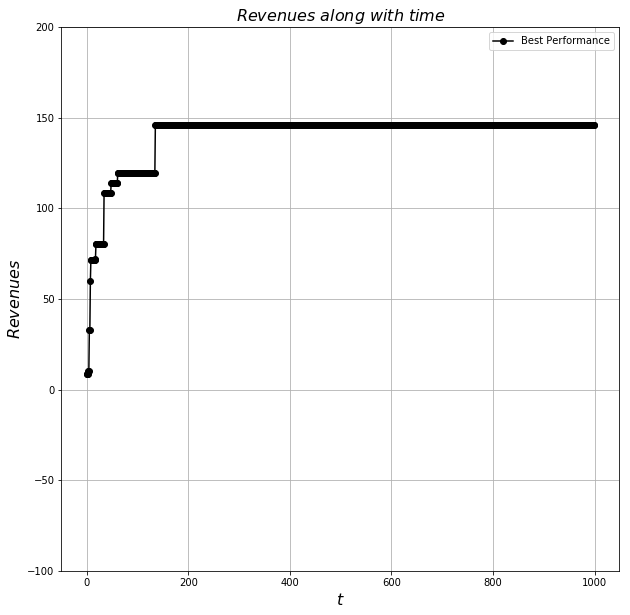

In [58]:
fig1 = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)

ax1.plot(performance[:,0], 'ko-', label='Best Performance')
#ax1.plot(performance[:,1], 'bo', label='Worst Performance')
#ax1.plot(performance[:,2], 'ro-', label='Average Performance')

ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$Revenues$', fontsize=16)

ax1.set_ylim(-100,200)
ax1.set_title('$Revenues$ $along$ $with$ $time$', fontsize=16)
ax1.grid()
ax1.legend()